In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd

from pprint import pprint

# Machine Learning - Linear Models - Regression
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Linear Models - Classification
from sklearn.linear_model import LogisticRegression   # Linear model for classification

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error   # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score             # R-squared (Coefficient of Determination) metric
from sklearn.metrics import confusion_matrix     # Generate a confusion matrix (actual vs. predicted counts)

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification

# Linear Models for Classification
Uses a linear model with an activation function to return a discrete value, which can then be mapped to a class / set of labels

## Create and Pre-Process Data: Generated Dataset

In [2]:
# Generate a dataset with 2 clusters of points
X, y = make_blobs(centers=2, cluster_std=3.0, random_state=42)
print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-3.94672034e+00  8.45730920e+00]
 [ 7.88903257e+00  5.13457584e+00]
 [-4.14234580e+00  9.34705390e+00]
 [ 7.10605932e+00  7.66354863e+00]
 [ 5.32225864e+00  5.89459795e+00]
 [-1.42501081e+00  1.36283958e+01]
 [ 5.46995123e+00  4.45471943e+00]
 [-1.21114570e-02  2.17885861e+00]
 [-3.68552208e+00  4.62374128e+00]
 [-5.02685019e+00  8.08664900e+00]]


X shape: (100, 2)
y shape: (100,)


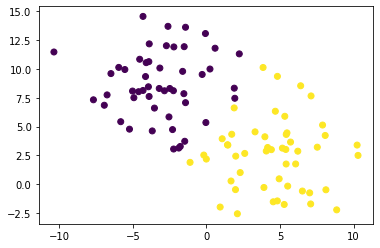

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
print (f"X shape: {X.shape}")
print (f"y shape: {y.shape}")

In [4]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Function: Fit Model, Evaluate Performance, Plot Classification Results

In [5]:
# Function to fit a model to training data, calculate predictions, and create a residuals chart
def gen_classification(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Get the solver used with this model
    m_solver = str(a_model).split("solver=")[1].split(",")[0].replace("'","").replace('"','')
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train, y_train)

    # Make predictions using both test and training data
    y_predicted_test = a_model.predict(X_test)
    y_predicted_train = a_model.predict(X_train)
    
    # Flag points that were classified incorrectly
    y_predicted_test_errors = y_test - y_predicted_test
    y_predicted_train_errors = y_train - y_predicted_train

    # Plot the training and test data, with prediction errors highlighted in different color

    # Generate a plot
    plt.scatter(X_test[:,0], X_test[:,1], c=y_predicted_test_errors)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_predicted_train_errors)
    
    # plt.legend()

    plt.title(f"Classification Results - Model: {m_name} / {m_solver}")

    plt.show()

    # Calculate Model performance: MSE and R2
    m_score_test = a_model.score(X_test, y_test)
    m_score_train = a_model.score(X_train, y_train)

    print(f"Performance - Model: {m_name}\nScore - Test Data: {m_score_test}, Training Data: {m_score_train}")
    print(f"coef_: {a_model.coef_}, intercept_: {a_model.intercept_}, n_iter_: {a_model.n_iter_}, ")
    a_result = {
        'model': m_name,
        'solver': m_solver,
        'fit_time': m_fit_time.average,
        'n_iter': a_model.n_iter_,
        'score_test': m_score_test,
        'score_train': m_score_train
    }
    
    return a_result

## Compare Model/Solver Performance: Generated Dataset

In [6]:
# Initialize list of dictionary of results for summary in a dataframe later
model_results = []

# List of Solvers to use with LogisticRegression model
solver_list = "liblinear", "newton-cg", "lbfgs", "sag", "saga"

11.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


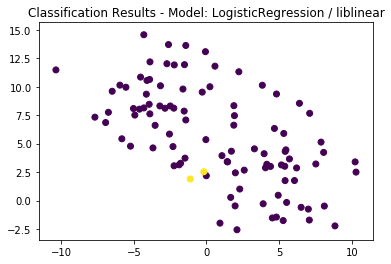

Performance - Model: LogisticRegression
Score - Test Data: 1.0, Training Data: 0.9733333333333334
coef_: [[ 1.12106444 -0.47513723]], intercept_: [1.29157877], n_iter_: [7], 

11.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


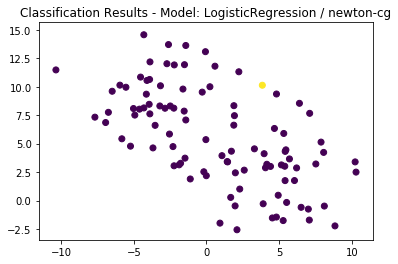

Performance - Model: LogisticRegression
Score - Test Data: 0.96, Training Data: 1.0
coef_: [[ 1.40244996 -1.03085451]], intercept_: [4.48159787], n_iter_: [11], 

3.28 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


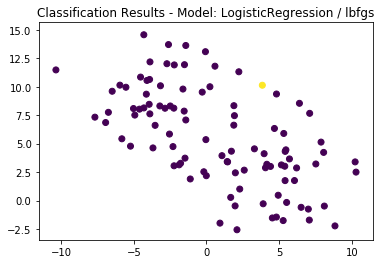

Performance - Model: LogisticRegression
Score - Test Data: 0.96, Training Data: 1.0
coef_: [[ 1.40245029 -1.03085438]], intercept_: [4.48159716], n_iter_: [18], 

20.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


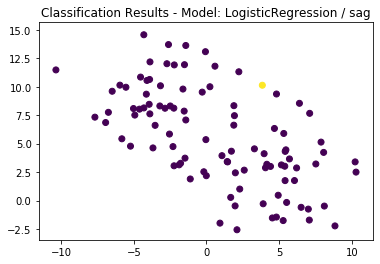

Performance - Model: LogisticRegression
Score - Test Data: 0.96, Training Data: 1.0
coef_: [[ 1.3724154  -0.99207271]], intercept_: [4.27447365], n_iter_: [665], 

28 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


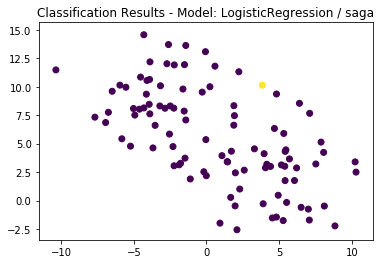

Performance - Model: LogisticRegression
Score - Test Data: 0.96, Training Data: 1.0
coef_: [[ 1.34415949 -0.95483833]], intercept_: [4.07516876], n_iter_: [1000], 



In [7]:
# Generate classifer and an associated performance report for each
for s in solver_list:
    # Create a classifier model
    classifier = LogisticRegression(solver=s, max_iter=1000)
    
    # Evaluate the classifer performance, create a plot of 
    r = gen_classification(classifier)
    model_results.append( {
        'Classifier': r['model'],
        'Solver': r['solver'],
        'Fit Time (ms)': 1000.0*r['fit_time'],
        'Iterations': int(r['n_iter']),
        'Score-Testing Data': r['score_test'],
        'Score-Training Data': r['score_train'] } )
    print("")

## Summary: Generated Dataset

In [8]:
summary_df = pd.DataFrame( model_results,
          columns=['Classifier', 'Solver', 'Fit Time (ms)', 'Iterations', 'Score-Testing Data', 'Score-Training Data'])
summary_df

,Classifier,Solver,Fit Time (ms),Iterations,Score-Testing Data,Score-Training Data
0,LogisticRegression,liblinear,11.2411,7,1.00,0.973333
1,LogisticRegression,newton-cg,11.0509,11,0.96,1.000000
2,LogisticRegression,lbfgs,3.2761,18,0.96,1.000000
3,LogisticRegression,sag,20.1951,665,0.96,1.000000
4,LogisticRegression,saga,27.9660,1000,0.96,1.000000


In [9]:
summary_df.mean()

Fit Time (ms)           14.745840
Iterations             340.200000
Score-Testing Data       0.968000
Score-Training Data      0.994667
dtype: float64

## Compare Model/Solver Performance: Voice Dataset

In [10]:
## Import Data and Pre-Process: Voice Dataset
voice = pd.read_csv('resources/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [11]:
# Check datatypes to ensure numerical values are floats vs. objects -- CONFIRMED
# voice.dtypes

In [12]:
# Assign X (data) and y (target)
X = voice.drop("label", axis=1)
y = voice["label"]
print(X.shape, y.shape)

(3168, 20) (3168,)


In [13]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [14]:
# Function to fit a model to training data, calculate predictions, and create a residuals chart
def gen_classification2(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Get the solver used with this model
    m_solver = str(a_model).split("solver=")[1].split(",")[0].replace("'","").replace('"','')
    
    # Print a separator
    print("*"*80)
    
    # Print the model attributes
    print(a_model)
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train, y_train)

    # Make predictions using both test and training data
    y_predicted_test = a_model.predict(X_test)
    y_predicted_train = a_model.predict(X_train)
    
#     # Flag points that were classified incorrectly
#     y_predicted_test_errors = y_test - y_predicted_test
#     y_predicted_train_errors = y_train - y_predicted_train

    # Calculate Model performance: MSE and R2
    m_score_test = a_model.score(X_test, y_test)
    m_score_train = a_model.score(X_train, y_train)

    print(f"Performance - Model: {m_name}\nScore - Test Data: {m_score_test}, Training Data: {m_score_train}")
    print(f"coef_: {a_model.coef_}, intercept_: {a_model.intercept_}, n_iter_: {a_model.n_iter_}, ")

    # Generate a confusion matrix of the results for both test and training data

    cm_test = confusion_matrix(y_test, a_model.predict(X_test))
    cm_test_df = pd.DataFrame(cm_test, columns = ["Female (Predicted)", "Male (Predicted)"], index = ["Female (Actual)", "Male (Actual)"] )
    print("Confusion Matrix - Testing Data")
    print(cm_test_df)

    print("")

    cm_train = confusion_matrix(y_train, a_model.predict(X_train))
    cm_train_df = pd.DataFrame(cm_train, columns = ["Female (Predicted)", "Male (Predicted)"], index = ["Female (Actual)", "Male (Actual)"] )
    print("Confusion Matrix - Training Data")
    print(cm_train_df)
    
#     # Plot the training and test data, with prediction errors highlighted in different color

#     # Generate a plot
#     plt.scatter(X_test[:,0], X_test[:,1], c=y_predicted_test_errors)
#     plt.scatter(X_train[:,0], X_train[:,1], c=y_predicted_train_errors)
    
#     # plt.legend()

#     plt.title(f"Classification Results - Model: {m_name} / {m_solver}")
#     plt.show()

    a_result = {
        'model': m_name,
        'solver': m_solver,
        'fit_time': m_fit_time.average,
        'n_iter': a_model.n_iter_,
        'score_test': m_score_test,
        'score_train': m_score_train
    }
    
    return a_result

## Classification Model: Logistic Regression

In [15]:
# Initialize list of dictionary of results for summary in a dataframe later
model_results = []

# List of Solvers to use with LogisticRegression model
solver_list = "liblinear", "newton-cg", "lbfgs", "sag", "saga"

# Generate classifer and an associated performance report for each
for s in solver_list:
    # Create a classifier model
    classifier = LogisticRegression(solver=s, n_jobs=1, max_iter=10000)
    
    # Evaluate the classifer performance, create a plot of 
    r = gen_classification2(classifier)
    model_results.append( {
        'Classifier': r['model'],
        'Solver': r['solver'],
        'Fit Time (ms)': 1000.0*r['fit_time'],
        'Iterations': int(r['n_iter']),
        'Score-Testing Data': r['score_test'],
        'Score-Training Data': r['score_train'] } )
    print("")

********************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
26.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Performance - Model: LogisticRegression
Score - Test Data: 0.9191919191919192, Training Data: 0.9078282828282829
coef_: [[-5.89619492e-01  1.53399178e+00 -9.19553166e-01 -5.29598693e+00
   2.84644857e+00  8.14243550e+00 -4.13412894e-01  1.21437995e-02
   4.36354157e+00 -4.17828855e-01  7.38816728e-01 -5.89619492e-01
  -1.60598156e+01  1.67748472e-01 -2.35239241e+00 -1.79488747e-01
  -7.99818426e-01 -4.11461517e-01  3.88356909e-01 -3.80961048e-01]], intercept_: [-0.05908685], n_iter_: [24], 
Confusion Matrix - Testing Data
                 Female (Predicted)  Male (Predicted)
Femal

## Summary

In [16]:
summary_df = pd.DataFrame( model_results,
          columns=['Classifier', 'Solver', 'Fit Time (ms)', 'Iterations', 'Score-Testing Data', 'Score-Training Data'])
summary_df

,Classifier,Solver,Fit Time (ms),Iterations,Score-Testing Data,Score-Training Data
0,LogisticRegression,liblinear,26.8882,24,0.919192,0.907828
1,LogisticRegression,newton-cg,89.3713,31,0.919192,0.907828
2,LogisticRegression,lbfgs,248.4898,484,0.919192,0.907407
3,LogisticRegression,sag,8713.8545,6009,0.729798,0.708754
4,LogisticRegression,saga,11877.2128,7126,0.715909,0.693182


In [17]:
summary_df.mean()

Fit Time (ms)          4191.163320
Iterations             2734.800000
Score-Testing Data        0.840657
Score-Training Data       0.825000
dtype: float64